In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing libraries

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

## Initializing the path of the dataset

In [2]:
x = "../input/intel-image-classification/seg_train/seg_train"
path = Path(x)
path.ls()

[PosixPath('../input/intel-image-classification/seg_train/seg_train/glacier'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/sea'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/forest'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/street'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/mountain'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/buildings')]

## Data preprocessing
### Extracting the images from the folders and labelling them based on their respective folder's name

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

## Visualizing the data and labels

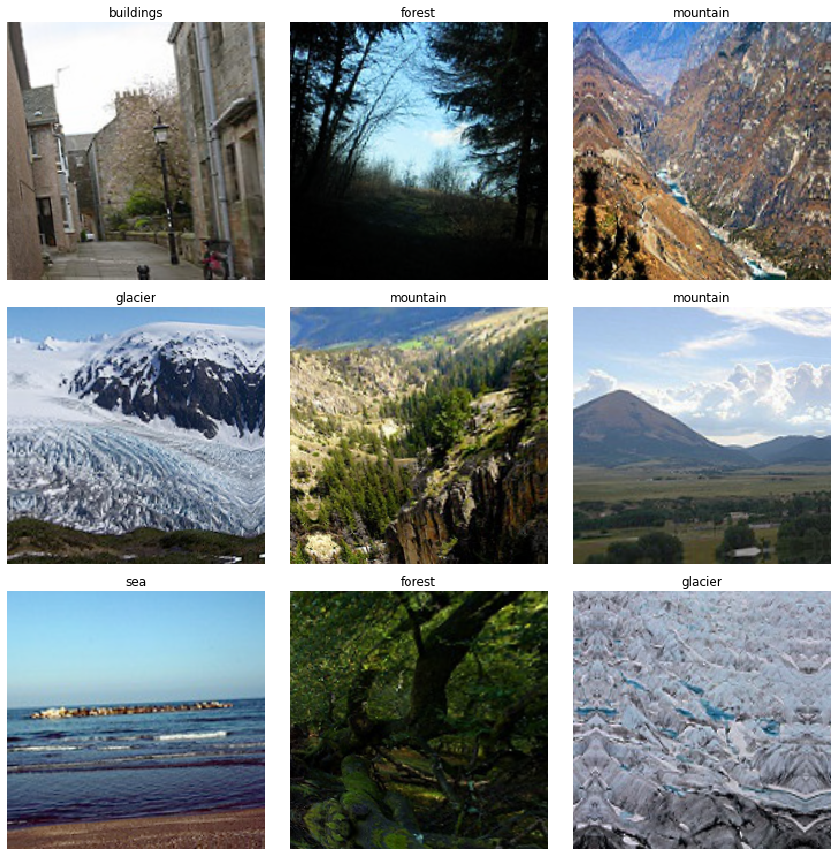

In [5]:
data.show_batch(rows=3, fig_size=(7,6))

## Training the data 
### Model architecture: Convolutional Neural Network (Resnet34)
### Evaluation metrics: Error rate

In [8]:
model = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.547306,0.339559,0.111547,01:40
1,0.349658,0.264834,0.090520,01:36
2,0.263667,0.228203,0.074483,01:36
3,0.236027,0.219207,0.070563,01:36


## Results
### Plotting the confusion matrix
### Plotting misclassified images

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

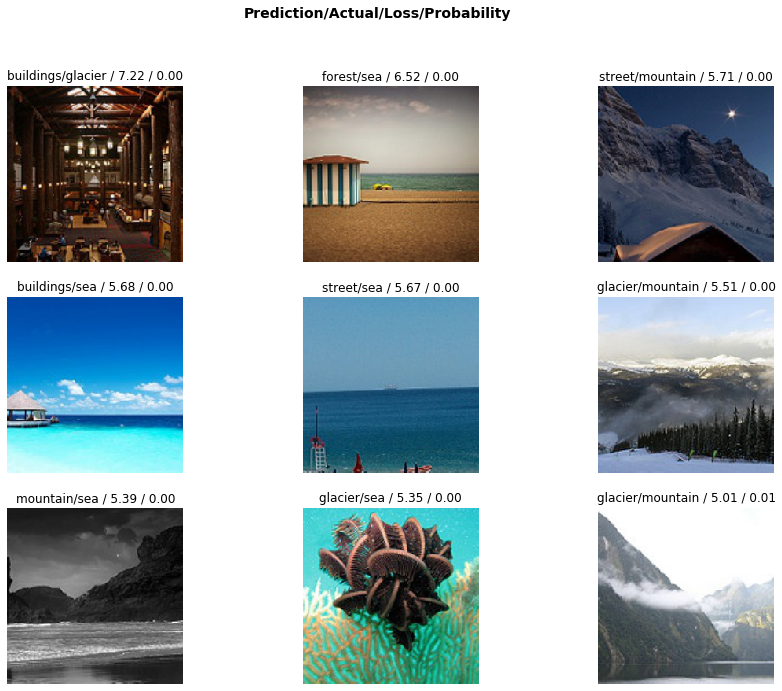

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

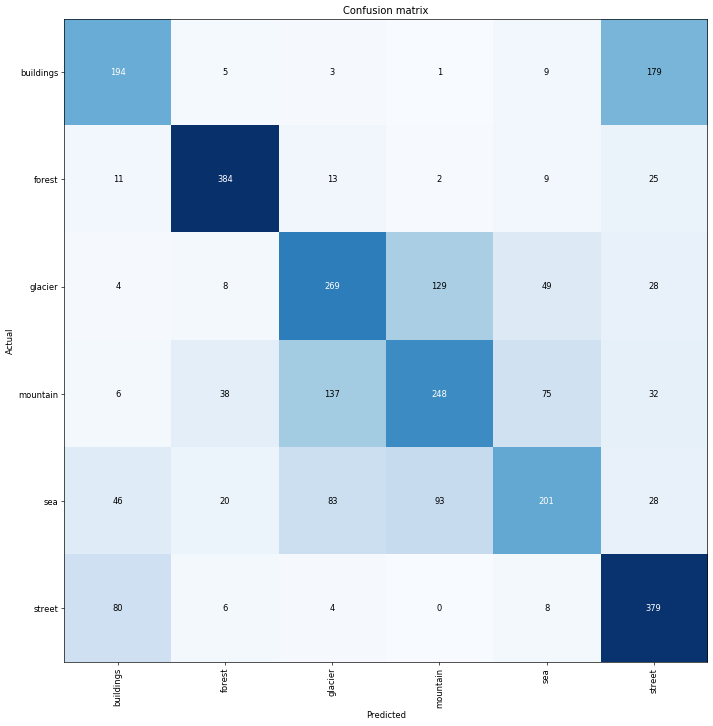

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
interp.most_confused(min_val=2)

[('buildings', 'street', 179),
 ('mountain', 'glacier', 137),
 ('glacier', 'mountain', 129),
 ('sea', 'mountain', 93),
 ('sea', 'glacier', 83),
 ('street', 'buildings', 80),
 ('mountain', 'sea', 75),
 ('glacier', 'sea', 49),
 ('sea', 'buildings', 46),
 ('mountain', 'forest', 38),
 ('mountain', 'street', 32),
 ('glacier', 'street', 28),
 ('sea', 'street', 28),
 ('forest', 'street', 25),
 ('sea', 'forest', 20),
 ('forest', 'glacier', 13),
 ('forest', 'buildings', 11),
 ('buildings', 'sea', 9),
 ('forest', 'sea', 9),
 ('glacier', 'forest', 8),
 ('street', 'sea', 8),
 ('mountain', 'buildings', 6),
 ('street', 'forest', 6),
 ('buildings', 'forest', 5),
 ('glacier', 'buildings', 4),
 ('street', 'glacier', 4),
 ('buildings', 'glacier', 3),
 ('forest', 'mountain', 2)]

## Fine-tuning the model

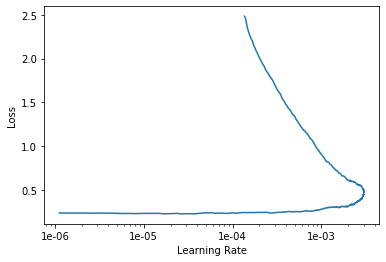

In [16]:
model.recorder.plot()

In [ ]:
model.unfreeze()
model.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))